Pendant la soutenance:
 + justifier le choix du modèle selectionner, par rapport a quel metric, la metric du temps, les deux trois meilleur

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from ast import literal_eval
from collections import Counter
from wordcloud import WordCloud


# Tokenizer
import nltk
nltk.download('popular')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer

#ML supervised
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import f1_score, hamming_loss, classification_report, fbeta_score

#word2vec
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
import multiprocessing

!pip install tensorflow_addons

#deep learning
from tensorflow.keras.regularizers import l1_l2

from transformers import BertTokenizer, TFBertForSequenceClassification, TFBertModel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
import tensorflow_addons as tfa
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

## Data

In [ ]:
data = pd.read_csv('data/QueryResults.csv')

In [ ]:
data

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Exclude Laravel-specific values from request,<p>I want to run <code>json_encode($request-&g...,<php><laravel><laravel-5><laravel-request><lar...,38664845,6,11470,0.0,2
1,How do I hide the middle of a table using jQuery?,<p>I have a really long 3 column table. I woul...,<jquery><html><html-table>,215219,49,68269,0.0,6
2,OpenId for gmail,<p>Anybody know how to get gmail's OpenID work...,<openid>,215235,16,21083,0.0,5
3,ROS: Can't find package configuration files,<p>EDIT: Okay so I decided to try something ra...,<python><opencv><cmake><ros>,38664936,5,26777,NaN,2
4,Threads per Processor,"<p>In Java, is there a programmatic way to fin...",<java><concurrency>,215236,27,34149,0.0,7
...,...,...,...,...,...,...,...,...
49995,Checks about WinRM service in remote machine,<p>I have seen great article<br>\nPowerShell 2...,<powershell><.net-4.0><powershell-remoting><wi...,10798167,9,44509,0.0,1
49996,Upload profile image for a user Firebase,<p>I am trying to add an image to the user inf...,<android><image><firebase><firebase-realtime-d...,46799461,4,13380,0.0,2
49997,DomPDF generation for chinese characters,<p>I am trying to generate a PDF that will con...,<php><dompdf><chinese-locale>,28435198,4,10524,NaN,1
49998,How to link an input button to a file select w...,<blockquote>\n <p><strong>Possible Duplicate:...,<javascript><jquery><html><forms><file-upload>,10798761,25,140064,0.0,2


In [ ]:
data = data[["Title","Body","Tags"]]

In [ ]:

# Function to parse tags
def parse_tags(tag_string):
    return re.findall('<(.*?)>', tag_string)

# Apply this function to your tags column
data['Tags'] = data['Tags'].apply(parse_tags)


/var/folders/5b/wffsnf0x45x80zvkm2wlrkym0000gn/T/ipykernel_15783/1363975796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tags'] = data['Tags'].apply(parse_tags)


In [ ]:
data.Tags

0        [php, laravel, laravel-5, laravel-request, lar...
1                               [jquery, html, html-table]
2                                                 [openid]
3                             [python, opencv, cmake, ros]
4                                      [java, concurrency]
                               ...                        
49995    [powershell, .net-4.0, powershell-remoting, wi...
49996    [android, image, firebase, firebase-realtime-d...
49997                        [php, dompdf, chinese-locale]
49998       [javascript, jquery, html, forms, file-upload]
49999                [java, string, servlets, file-io, io]
Name: Tags, Length: 50000, dtype: object

In [ ]:

# Flatten the list of tags and count the occurrences of each tag
tag_counts = Counter(tag for tags in data['Tags'] for tag in tags)

# Get the 20 most common tags
common_tags = tag_counts.most_common(20)

# If you want just the tag names, not their counts, you can do this:
common_tag_names = [tag for tag, count in common_tags]


In [ ]:
common_tag_names

['java',
 'c#',
 'javascript',
 'python',
 'php',
 'android',
 'html',
 'jquery',
 'c++',
 '.net',
 'css',
 'sql',
 'asp.net',
 'mysql',
 'c',
 'sql-server',
 'ios',
 'linux',
 'iphone',
 'arrays']

In [ ]:
# Function to check if list of tags contains at least one of the common tags
def contains_common_tag(tags):
    return any(tag in common_tag_names for tag in tags)

# Apply this function to the tags column and filter the dataframe
filtered_data = data[data['Tags'].apply(contains_common_tag)]


In [ ]:
# Function to filter a list of tags
def filter_tags(tags):
    return [tag for tag in tags if tag in common_tag_names]

# Apply this function to the 'tags' column
filtered_data['target'] = filtered_data['Tags'].apply(filter_tags)


In [ ]:
filtered_data["title_body"] = filtered_data["Title"].fillna('') + " " + filtered_data['Body'].fillna('')


In [ ]:
filtered_data.head()

,Title,Body,Tags,target,title_body
0,Exclude Laravel-specific values from request,<p>I want to run <code>json_encode($request-&g...,"[php, laravel, laravel-5, laravel-request, lar...",[php],Exclude Laravel-specific values from request <...
1,How do I hide the middle of a table using jQuery?,<p>I have a really long 3 column table. I woul...,"[jquery, html, html-table]","[jquery, html]",How do I hide the middle of a table using jQue...
3,ROS: Can't find package configuration files,<p>EDIT: Okay so I decided to try something ra...,"[python, opencv, cmake, ros]",[python],ROS: Can't find package configuration files <p...
4,Threads per Processor,"<p>In Java, is there a programmatic way to fin...","[java, concurrency]",[java],"Threads per Processor <p>In Java, is there a p..."
5,"C# ListView Detail, Highlight a single cell",<p>I'm using a ListView in C# to make a grid. ...,"[c#, listview, highlight, ownerdrawn]",[c#],"C# ListView Detail, Highlight a single cell <p..."


In [ ]:
filtered_data['target'].isna().sum()

0

In [ ]:

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words

stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

def clean_target (text):

    tokenized = word_tokenize(text) # Tokenize
    return     tokenized

filtered_data['text_bow'] = filtered_data['title_body'].apply(lambda x : transform_bow_fct(x))
filtered_data['text_bow_lem'] = filtered_data['title_body'].apply(lambda x : transform_bow_lem_fct(x))
filtered_data['text_dl'] = filtered_data['title_body'].apply(lambda x : transform_dl_fct(x))


In [ ]:
filtered_data

,Title,Body,Tags,target,title_body,text_bow,text_bow_lem,text_dl
0,Exclude Laravel-specific values from request,<p>I want to run <code>json_encode($request-&g...,"[php, laravel, laravel-5, laravel-request, lar...",[php],Exclude Laravel-specific values from request <...,exclude laravel specific values request want r...,exclude laravel specific value request want ru...,exclude laravel specific values from request <...
1,How do I hide the middle of a table using jQuery?,<p>I have a really long 3 column table. I woul...,"[jquery, html, html-table]","[jquery, html]",How do I hide the middle of a table using jQue...,how hide middle table using jquery really long...,how hide middle table using jquery really long...,how do i hide the middle of a table using jque...
3,ROS: Can't find package configuration files,<p>EDIT: Okay so I decided to try something ra...,"[python, opencv, cmake, ros]",[python],ROS: Can't find package configuration files <p...,ros n't find package configuration files edit ...,ro n't find package configuration file edit ok...,ros : ca n't find package configuration files ...
4,Threads per Processor,"<p>In Java, is there a programmatic way to fin...","[java, concurrency]",[java],"Threads per Processor <p>In Java, is there a p...",threads per processor java programmatic way fi...,thread per processor java programmatic way fin...,"threads per processor < p > in java , is there..."
5,"C# ListView Detail, Highlight a single cell",<p>I'm using a ListView in C# to make a grid. ...,"[c#, listview, highlight, ownerdrawn]",[c#],"C# ListView Detail, Highlight a single cell <p...",listview detail highlight single cell using li...,listview detail highlight single cell using li...,"c listview detail , highlight a single cell < ..."
...,...,...,...,...,...,...,...,...
49994,get value by key of php object array,<p>I have a PHP object and I am trying to get ...,"[php, arrays]","[php, arrays]",get value by key of php object array <p>I have...,get value key php object array php object tryi...,get value key php object array php object tryi...,get value by key of php object array < p > i h...
49996,Upload profile image for a user Firebase,<p>I am trying to add an image to the user inf...,"[android, image, firebase, firebase-realtime-d...",[android],Upload profile image for a user Firebase <p>I ...,upload profile image user firebase trying add ...,upload profile image user firebase trying add ...,upload profile image for a user firebase < p >...
49997,DomPDF generation for chinese characters,<p>I am trying to generate a PDF that will con...,"[php, dompdf, chinese-locale]",[php],DomPDF generation for chinese characters <p>I ...,dompdf generation chinese characters trying ge...,dompdf generation chinese character trying gen...,dompdf generation for chinese characters < p >...
49998,How to link an input button to a file select w...,<blockquote>\n <p><strong>Possible Duplicate:...,"[javascript, jquery, html, forms, file-upload]","[javascript, jquery, html]",How to link an input button to a file select w...,how link input button file select window block...,how link input button file select window block...,how to link an input button to a file select w...


In [ ]:
filtered_data

,Title,Body,Tags,target,title_body,text_bow,text_bow_lem,text_dl
0,Exclude Laravel-specific values from request,<p>I want to run <code>json_encode($request-&g...,"[php, laravel, laravel-5, laravel-request, lar...",[php],Exclude Laravel-specific values from request <...,exclude laravel specific values request want r...,exclude laravel specific value request want ru...,exclude laravel specific values from request <...
1,How do I hide the middle of a table using jQuery?,<p>I have a really long 3 column table. I woul...,"[jquery, html, html-table]","[jquery, html]",How do I hide the middle of a table using jQue...,how hide middle table using jquery really long...,how hide middle table using jquery really long...,how do i hide the middle of a table using jque...
3,ROS: Can't find package configuration files,<p>EDIT: Okay so I decided to try something ra...,"[python, opencv, cmake, ros]",[python],ROS: Can't find package configuration files <p...,ros n't find package configuration files edit ...,ro n't find package configuration file edit ok...,ros : ca n't find package configuration files ...
4,Threads per Processor,"<p>In Java, is there a programmatic way to fin...","[java, concurrency]",[java],"Threads per Processor <p>In Java, is there a p...",threads per processor java programmatic way fi...,thread per processor java programmatic way fin...,"threads per processor < p > in java , is there..."
5,"C# ListView Detail, Highlight a single cell",<p>I'm using a ListView in C# to make a grid. ...,"[c#, listview, highlight, ownerdrawn]",[c#],"C# ListView Detail, Highlight a single cell <p...",listview detail highlight single cell using li...,listview detail highlight single cell using li...,"c listview detail , highlight a single cell < ..."
...,...,...,...,...,...,...,...,...
49994,get value by key of php object array,<p>I have a PHP object and I am trying to get ...,"[php, arrays]","[php, arrays]",get value by key of php object array <p>I have...,get value key php object array php object tryi...,get value key php object array php object tryi...,get value by key of php object array < p > i h...
49996,Upload profile image for a user Firebase,<p>I am trying to add an image to the user inf...,"[android, image, firebase, firebase-realtime-d...",[android],Upload profile image for a user Firebase <p>I ...,upload profile image user firebase trying add ...,upload profile image user firebase trying add ...,upload profile image for a user firebase < p >...
49997,DomPDF generation for chinese characters,<p>I am trying to generate a PDF that will con...,"[php, dompdf, chinese-locale]",[php],DomPDF generation for chinese characters <p>I ...,dompdf generation chinese characters trying ge...,dompdf generation chinese character trying gen...,dompdf generation for chinese characters < p >...
49998,How to link an input button to a file select w...,<blockquote>\n <p><strong>Possible Duplicate:...,"[javascript, jquery, html, forms, file-upload]","[javascript, jquery, html]",How to link an input button to a file select w...,how link input button file select window block...,how link input button file select window block...,how to link an input button to a file select w...


In [ ]:
filtered_data.to_csv("data/filtered_data_new.csv",index=False)

## filtered_data

In [2]:
import pandas as pd

In [3]:
filtered_data = pd.read_csv("/content/drive/MyDrive/openclassroom/data/filtered_data_new.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/openclassroom/data/filtered_data_new.csv'

In [ ]:
filtered_data = filtered_data.head(3000)

In [ ]:

filtered_data["title_body"][0]

'Exclude Laravel-specific values from request <p>I want to run <code>json_encode($request-&gt;all())</code> after a form is submitted, however the returned array is "polluted" with <code>_method</code> and <code>_token</code> values. </p>\n\n<p>Is there any neat way to exclude the framework-specific fields from the generated json?</p>\n'

In [ ]:
# tag les plus fréquents ( Histogramme )
# les mots les plus fréquents ( Histogramme )
# les mots les plus fréquents par tag ( Histogramme )
# les mots les plus fréquents par tag ( WordCloud )

## Analyse descriptive

### Tag les plus fréquents ( Histogramme )

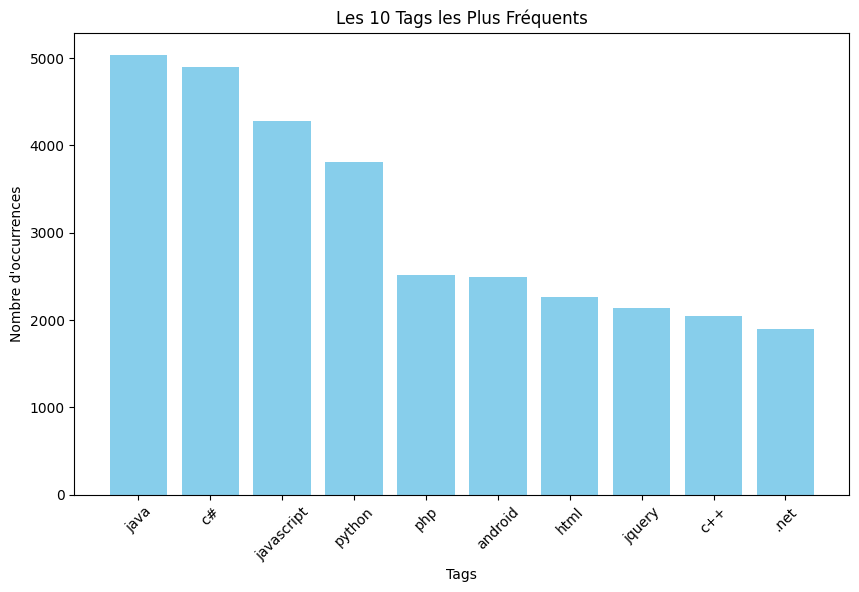

In [ ]:
# Conversion des chaînes de tags en listes
filtered_data_3000['Tags']

# Comptage de la fréquence de chaque tag
all_tags = [tag for tags_list in filtered_data_3000['Tags'] for tag in tags_list]
tag_counts = Counter(all_tags)

# Préparation des données pour l'histogramme
most_common_tags = tag_counts.most_common(10)
tags, counts = zip(*most_common_tags)

# Création de l'histogramme pour les tags les plus fréquents
plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Nombre d\'occurrences')
plt.title('Les 10 Tags les Plus Fréquents')
plt.xticks(rotation=45)
plt.show()

### les mots les plus fréquents ( Histogramme )


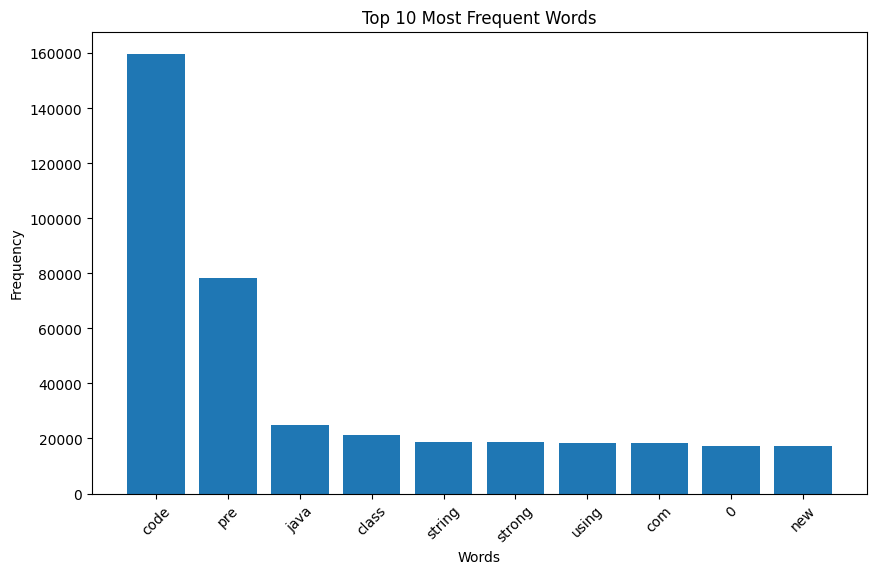

In [ ]:
# Fonction pour nettoyer et extraire les mots
def extract_words(text):
    # Suppression des balises HTML
    text_clean = re.sub('<.*?>', '', text)
    # Extraction des mots
    words = re.findall(r'\b\w+\b', text_clean.lower())
    return words

# Extraire les mots de la colonne 'Body'
all_words = [word for body in filtered_data_3000['text_bow'] for word in extract_words(body)]
word_counts = Counter(all_words)

# Préparation des données pour l'histogramme des mots les plus fréquents
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

# Création de l'histogramme pour les mots les plus fréquents
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


### WordClouds pour les 5 tags les plus fréquents

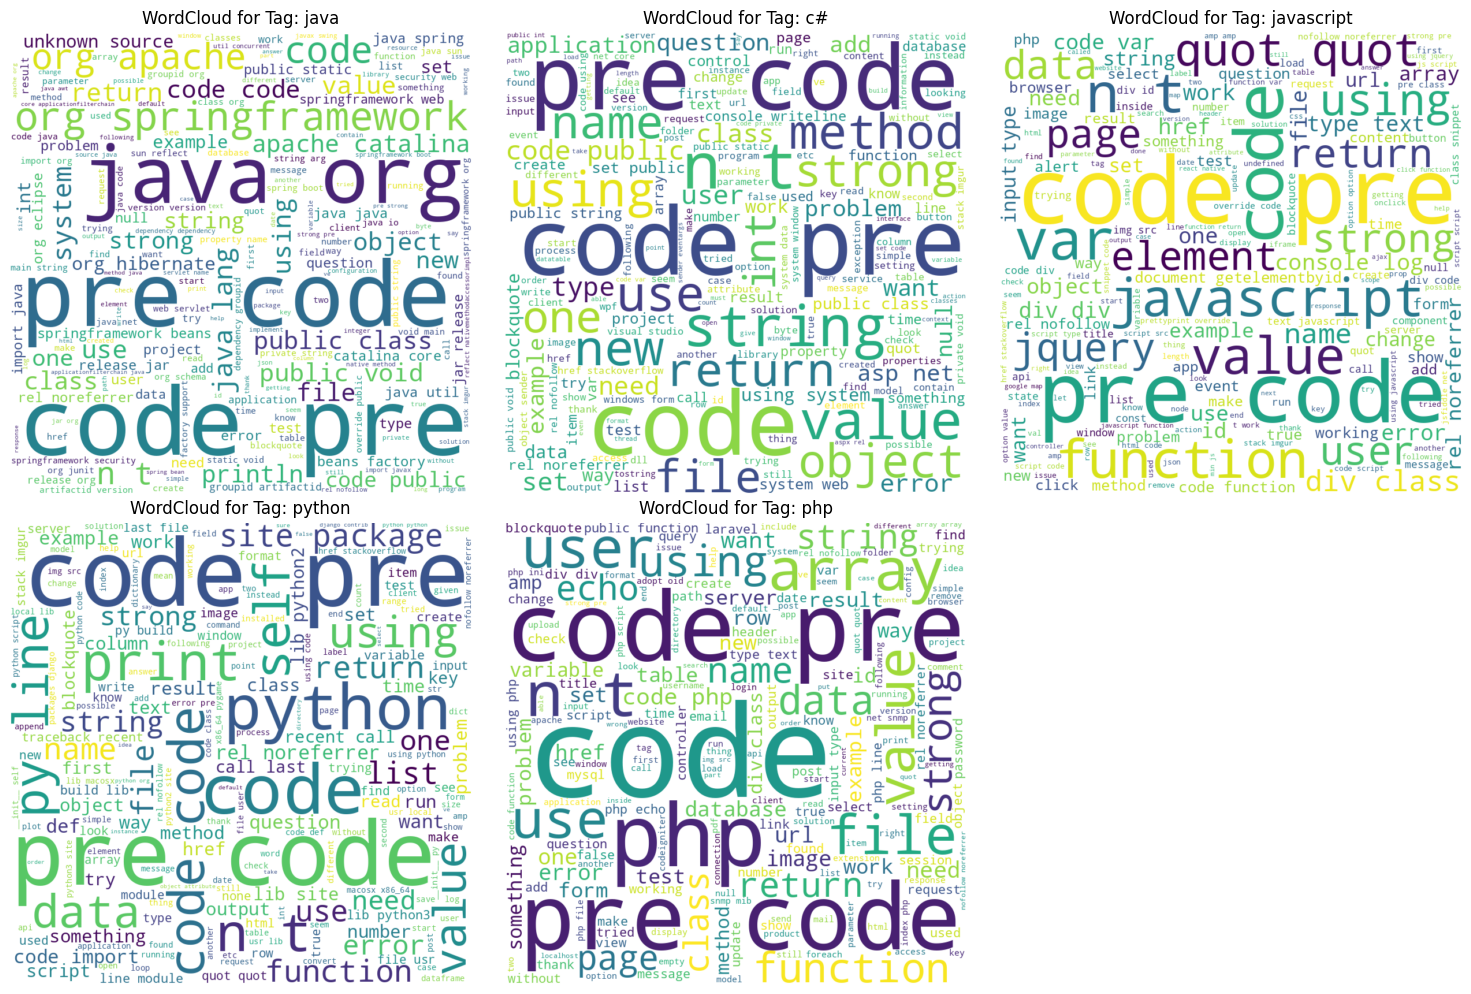

In [ ]:
# regarder pourquoi plusieur aparraissent(enelever espaces)


# Sélection des 5 tags les plus fréquents
top_5_tags = [tag for tag, count in tag_counts.most_common(5)]

# Création d'un dictionnaire pour stocker le texte associé à chaque tag
tag_to_text = {tag: '' for tag in top_5_tags}

# Parcourir chaque ligne du DataFrame pour ajouter le texte au tag correspondant
for _, row in filtered_data_3000.iterrows():
    for tag in row['Tags']:
        if tag in top_5_tags:
            tag_to_text[tag] += ' '.join(extract_words(row['text_bow'])) + ' '

# Création des WordClouds pour chaque tag
plt.figure(figsize=(15, 10))

for i, tag in enumerate(top_5_tags, 1):
    plt.subplot(2, 3, i)
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(tag_to_text[tag])

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Tag: {tag}')
    plt.axis("off")

plt.tight_layout()
plt.show()



## Countvectorizer, TF-IDF, Word2Vec

In [ ]:
filtered_data["target"].value_counts()

target
['java']                                   4323
['python']                                 3548
['c#']                                     2934
['javascript']                             2260
['android']                                2074
                                           ... 
['javascript', 'jquery', 'ios']               1
['sql', 'android']                            1
['html', 'ios', 'css', 'iphone']              1
['php', 'ios']                                1
['javascript', 'jquery', 'css', 'html']       1
Name: count, Length: 374, dtype: int64

In [1]:

filtered_data

NameError: name 'filtered_data' is not defined

In [ ]:
filtered_data["title_body"][33375]

'DomPDF generation for chinese characters <p>I am trying to generate a PDF that will contain Chinese characters using dompdf.\nHere is my code:</p>\n\n<pre><code>require(\'dompdf/dompdf_config.inc.php\');\n$dompdf = new DOMPDF();\nmb_internal_encoding(\'UTF-8\');\ndef("DOMPDF_UNICODE_ENABLED", true);\n$html = \' &lt;html&gt; &lt;head&gt; &lt;meta http-equiv="Content-Type" content="text/html; charset=utf-8"/&gt; \n &lt;style&gt;\n     *{ font-family: DejaVu Sans, font-size: 12px;}\n &lt;/style&gt; &lt;/head&gt; &lt;body&gt;\n 忠烈祠\n  &lt;/body&gt;\n &lt;/html&gt;\';\n $dompdf-&gt;load_html($html);\n $dompdf-&gt;render();\n$output = $dompdf-&gt;output();\n $filename = \'a.pdf\';\n$path = $filename;\nfile_put_contents($path, $output);\n</code></pre>\n\n<p>The problem is the the generated PDF show only squares when i open it with chrome or adobe reader, but it looks ok in Mozilla firefox.</p>\n\n<p>Any sugestions?</p>\n'

In [ ]:

# Convert the target strings into actual lists
tags_as_lists = filtered_data.target.apply(literal_eval)
mlb = MultiLabelBinarizer()

# Fit the MultiLabelBinarizer on your tags
mlb.fit(tags_as_lists)

# Transform your tags into one-hot encoded format
y = mlb.transform(tags_as_lists)
X = filtered_data["text_bow_lem"]
# Get all possible labels

labels = mlb.classes_

In [ ]:

tags_as_lists

0                             [php]
1                    [jquery, html]
2                          [python]
3                            [java]
4                              [c#]
                    ...            
33373                 [php, arrays]
33374                     [android]
33375                         [php]
33376    [javascript, jquery, html]
33377                        [java]
Name: target, Length: 33378, dtype: object

In [ ]:
mlb


MultiLabelBinarizer()

In [ ]:

y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the vectorizer and classifiers
vectorizer = TfidfVectorizer()
base_classifier = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
classifier = OneVsRestClassifier(base_classifier)

# Convert the text data into vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the multi-label model
classifier.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = classifier.predict_proba(X_test_tfidf)

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(y_test[:, label], y_pred, beta=5,average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Now, best_thresholds[i] is the threshold which gives the best F5 score for the i-th label,
# and best_scores[i] is the best F5 score for the i-th label.

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Convert predicted labels back to original tag format

pred_tags = mlb.inverse_transform(y_pred)
actual_tags = mlb.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the Hamming loss
hamming = hamming_loss(y_test, y_pred)

print(f'Hamming Loss: {hamming}')
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


Hamming Loss: 0.02999800279608548
              precision    recall  f1-score   support

        .net       0.65      0.23      0.34       586
     android       0.95      0.88      0.92       703
      arrays       0.58      0.55      0.57       214
     asp.net       0.73      0.66      0.69       425
           c       0.75      0.36      0.49       332
          c#       0.73      0.53      0.62      1490
         c++       0.90      0.45      0.60       601
         css       0.83      0.70      0.76       459
        html       0.68      0.53      0.59       676
         ios       0.74      0.53      0.62       255
      iphone       0.66      0.67      0.67       220
        java       0.89      0.82      0.85      1510
  javascript       0.84      0.73      0.78      1271
      jquery       0.86      0.81      0.84       668
       linux       0.72      0.57      0.64       240
       mysql       0.78      0.80      0.79       358
         php       0.90      0.82      0.86    

/Users/liamabramczyk/.pyenv/versions/3.10.6/envs/Liam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the vectorizer and classifiers
vectorizer = TfidfVectorizer()
base_classifier = LogisticRegression()
classifier = OneVsRestClassifier(base_classifier)

# Convert the text data into vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the multi-label model
classifier.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = classifier.predict_proba(X_test_tfidf)

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(y_test[:, label], y_pred, beta=5,average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Now, best_thresholds[i] is the threshold which gives the best F5 score for the i-th label,
# and best_scores[i] is the best F5 score for the i-th label.

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Convert predicted labels back to original tag format

pred_tags = mlb.inverse_transform(y_pred)
actual_tags = mlb.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the Hamming loss
hamming = hamming_loss(y_test, y_pred)

print(f'Hamming Loss: {hamming}')
print(classification_report(y_test , y_pred, target_names=mlb.classes_))


Hamming Loss: 0.031381066506890355
              precision    recall  f1-score   support

        .net       0.65      0.21      0.31       586
     android       0.92      0.88      0.90       703
      arrays       0.62      0.44      0.52       214
     asp.net       0.83      0.51      0.63       425
           c       0.69      0.41      0.52       332
          c#       0.73      0.63      0.67      1490
         c++       0.76      0.59      0.66       601
         css       0.80      0.77      0.78       459
        html       0.73      0.42      0.53       676
         ios       0.68      0.49      0.57       255
      iphone       0.69      0.54      0.61       220
        java       0.88      0.81      0.84      1510
  javascript       0.78      0.79      0.78      1271
      jquery       0.85      0.72      0.78       668
       linux       0.73      0.51      0.60       240
       mysql       0.85      0.60      0.70       358
         php       0.86      0.80      0.83   

/Users/liamabramczyk/.pyenv/versions/3.10.6/envs/Liam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the vectorizer and classifiers
vectorizer = TfidfVectorizer()
base_classifier = RandomForestClassifier()
classifier = OneVsRestClassifier(base_classifier)

# Convert the text data into vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the multi-label model
classifier.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = classifier.predict_proba(X_test_tfidf)

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(y_test[:, label], y_pred, beta=5,average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Now, best_thresholds[i] is the threshold which gives the best F5 score for the i-th label,
# and best_scores[i] is the best F5 score for the i-th label.

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Convert predicted labels back to original tag format

pred_tags = mlb.inverse_transform(y_pred)
actual_tags = mlb.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the Hamming loss
hamming = hamming_loss(y_test, y_pred)

print(f'Hamming Loss: {hamming}')
print(classification_report(y_test , y_pred, target_names=mlb.classes_))


Hamming Loss: 0.029903135610145796
              precision    recall  f1-score   support

        .net       0.69      0.13      0.22       586
     android       0.96      0.91      0.94       703
      arrays       0.62      0.30      0.41       214
     asp.net       0.78      0.58      0.67       425
           c       0.81      0.32      0.45       332
          c#       0.69      0.70      0.69      1490
         c++       0.88      0.50      0.64       601
         css       0.83      0.65      0.73       459
        html       0.67      0.40      0.50       676
         ios       0.72      0.68      0.70       255
      iphone       0.63      0.66      0.65       220
        java       0.89      0.83      0.86      1510
  javascript       0.81      0.75      0.78      1271
      jquery       0.89      0.77      0.82       668
       linux       0.71      0.57      0.63       240
       mysql       0.80      0.73      0.76       358
         php       0.88      0.87      0.87   

/Users/liamabramczyk/.pyenv/versions/3.10.6/envs/Liam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the vectorizer and classifiers
vectorizer = TfidfVectorizer()
base_classifier = SVC(probability=True)
classifier = OneVsRestClassifier(base_classifier)

# Convert the text data into vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the multi-label model
classifier.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = classifier.predict_proba(X_test_tfidf)

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(y_test[:, label], y_pred, beta=5,average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Now, best_thresholds[i] is the threshold which gives the best F5 score for the i-th label,
# and best_scores[i] is the best F5 score for the i-th label.

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Convert predicted labels back to original tag format

pred_tags = mlb.inverse_transform(y_pred)
actual_tags = mlb.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the Hamming loss
hamming = hamming_loss(y_test, y_pred)

print(f'Hamming Loss: {hamming}')
print(classification_report(y_test , y_pred, target_names=mlb.classes_))


## Word2vec

In [ ]:
filtered_data_3000

,Title,Body,Tags,target,title_body,text_bow,text_bow_lem,text_dl
0,Exclude Laravel-specific values from request,<p>I want to run <code>json_encode($request-&g...,"['php', 'laravel', 'laravel-5', 'laravel-reque...",['php'],Exclude Laravel-specific values from request <...,exclude laravel specific values request want r...,exclude laravel specific value request want ru...,exclude laravel specific values from request <...
1,How do I hide the middle of a table using jQuery?,<p>I have a really long 3 column table. I woul...,"['jquery', 'html', 'html-table']","['jquery', 'html']",How do I hide the middle of a table using jQue...,how hide middle table using jquery really long...,how hide middle table using jquery really long...,how do i hide the middle of a table using jque...
2,ROS: Can't find package configuration files,<p>EDIT: Okay so I decided to try something ra...,"['python', 'opencv', 'cmake', 'ros']",['python'],ROS: Can't find package configuration files <p...,ros n't find package configuration files edit ...,ro n't find package configuration file edit ok...,ros : ca n't find package configuration files ...
3,Threads per Processor,"<p>In Java, is there a programmatic way to fin...","['java', 'concurrency']",['java'],"Threads per Processor <p>In Java, is there a p...",threads per processor java programmatic way fi...,thread per processor java programmatic way fin...,"threads per processor < p > in java , is there..."
4,"C# ListView Detail, Highlight a single cell",<p>I'm using a ListView in C# to make a grid. ...,"['c#', 'listview', 'highlight', 'ownerdrawn']",['c#'],"C# ListView Detail, Highlight a single cell <p...",listview detail highlight single cell using li...,listview detail highlight single cell using li...,"c listview detail , highlight a single cell < ..."
...,...,...,...,...,...,...,...,...
2995,What is the best way to clone/deep copy a .NET...,<p>I've got a generic dictionary <code>Diction...,"['c#', 'generics', 'collections', 'clone']",['c#'],What is the best way to clone/deep copy a .NET...,what best way clone deep copy .net generic dic...,what best way clone deep copy .net generic dic...,what is the best way to clone deep copy a .net...
2996,"ProcessStartInfo hanging on ""WaitForExit""? Why?",<p>I have the following code:</p>\n<pre><code>...,"['c#', 'processstartinfo']",['c#'],"ProcessStartInfo hanging on ""WaitForExit""? Why...",processstartinfo hanging waitforexit why follo...,processstartinfo hanging waitforexit why follo...,processstartinfo hanging on `` waitforexit '' ...
2997,Where to find packages names and versions for ...,<p>How can I find out whether a specific RedHa...,"['linux', 'package', 'redhat', 'rpm']",['linux'],Where to find packages names and versions for ...,where find packages names versions redhat how ...,where find package name version redhat how fin...,where to find packages names and versions for ...
2998,What is the difference between myCustomer.GetT...,<p>I've seen both done in some code I'm mainta...,"['c#', '.net']","['c#', '.net']",What is the difference between myCustomer.GetT...,what difference mycustomer.gettype typeof cust...,what difference mycustomer.gettype typeof cust...,what is the difference between mycustomer.gett...


In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = filtered_data_3000['text_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 17923
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 17924


In [ ]:
# Création de la matrice d'embedding

# Instantiate the tokenizer
print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0

for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

if i != 0:
    word_rate = np.round(j / i, 4)
else:
    word_rate = 0  # or any other value that makes sense in this context

print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (17924, 300)


In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           5377200   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 5,377,200
Trainable params: 5,377,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:

embeddings = embed_model.predict(x_sentences)
embeddings.shape

94/94 [==============================] - 0s 712us/step


(3000, 300)

In [ ]:
embeddings

array([[ 0.48121908,  0.2138651 , -0.7622085 , ...,  0.07635271,
         0.08924577, -0.9941214 ],
       [ 0.38339114,  0.30536655,  0.09549854, ..., -0.08861315,
         0.17691685, -0.6768816 ],
       [-0.24734576,  0.36394322,  0.07564224, ...,  0.5343222 ,
         0.17418228, -0.14496002],
       ...,
       [-0.2448231 , -0.28125337,  0.57233685, ...,  0.05678407,
         0.09817948, -0.506722  ],
       [ 0.07463616,  0.08657026, -0.5523841 , ...,  0.17663173,
         0.03873565, -0.12631075],
       [ 0.3265965 ,  0.4338549 , -0.6678304 , ...,  0.30985412,
         0.39385724, -0.97257394]], dtype=float32)

In [ ]:
y.shape

(3000, 20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, y,test_size=0.3 , random_state=42)

In [ ]:



# Instantiate the vectorizer and classifiers

base_classifier = XGBClassifier(random_state=42)
classifier = OneVsRestClassifier(base_classifier)

# Convert the text data into vectors


# Train the multi-label model
classifier.fit(X_train, y_train)

# Predict probabilities
y_prob = classifier.predict_proba(X_test)

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(y_test[:, label], y_pred, beta=5,average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Now, best_thresholds[i] is the threshold which gives the best F5 score for the i-th label,
# and best_scores[i] is the best F5 score for the i-th label.

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Convert predicted labels back to original tag format

pred_tags = mlb.inverse_transform(y_pred)
actual_tags = mlb.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the Hamming loss
hamming = hamming_loss(y_test, y_pred)

print(f'Hamming Loss: {hamming}')
print(classification_report(y_test , y_pred, target_names=mlb.classes_))


Hamming Loss: 0.05427777777777778
              precision    recall  f1-score   support

        .net       0.50      0.02      0.04        96
     android       0.62      0.16      0.25        32
      arrays       0.80      0.19      0.31        21
     asp.net       0.75      0.17      0.27        54
           c       0.50      0.04      0.08        24
          c#       0.52      0.15      0.23       160
         c++       0.68      0.28      0.40        61
         css       0.71      0.32      0.44        31
        html       0.76      0.25      0.38        51
         ios       0.83      0.31      0.45        16
      iphone       0.00      0.00      0.00        15
        java       0.79      0.33      0.47       151
  javascript       0.76      0.33      0.46       106
      jquery       1.00      0.02      0.04        45
       linux       1.00      0.05      0.10        20
       mysql       1.00      0.33      0.50        33
         php       0.83      0.21      0.34    

/Users/liamabramczyk/.pyenv/versions/3.10.6/envs/Liam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liamabramczyk/.pyenv/versions/3.10.6/envs/Liam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## deep learning

In [ ]:
# a faire !!

### Model

In [ ]:
filtered_data["text_dl"]


0       exclude laravel specific values from request <...
1       how do i hide the middle of a table using jque...
2       ros : ca n't find package configuration files ...
3       threads per processor < p > in java , is there...
4       c listview detail , highlight a single cell < ...
                              ...                        
2995    what is the best way to clone deep copy a .net...
2996    processstartinfo hanging on `` waitforexit '' ...
2997    where to find packages names and versions for ...
2998    what is the difference between mycustomer.gett...
2999    pick a random letter from string in javascript...
Name: text_dl, Length: 3000, dtype: object

In [ ]:

tokenizer = Tokenizer()

# Adaptation du tokenizer sur la colonne 'text_dl'
tokenizer.fit_on_texts(filtered_data["text_dl"])

# Conversion des textes en séquences
sequences = tokenizer.texts_to_sequences(filtered_data["text_dl"])

# Padding des séquences pour qu'elles aient la même longueur
X = pad_sequences(sequences)

# Préparation des labels
tags_as_lists = filtered_data['target'].apply(literal_eval)
mlb = MultiLabelBinarizer()

# Adaptation du MultiLabelBinarizer sur les tags
mlb.fit(tags_as_lists)

# Transformation des tags en format encodé one-hot
y = mlb.transform(tags_as_lists)


In [ ]:
# REvoir le mlb.classes

print(mlb.classes_)

['.net' 'android' 'arrays' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios'
 'iphone' 'java' 'javascript' 'jquery' 'linux' 'mysql' 'php' 'python'
 'sql' 'sql-server']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X

array([[  0,   0,   0, ..., 702, 286,   1],
       [  0,   0,   0, ..., 228, 121,   1],
       [  0,   0,   0, ...,   3,   5,  12],
       ...,
       [  0,   0,   0, ..., 409, 221,   1],
       [  0,   0,   0, ...,  14, 708,   1],
       [  0,   0,   0, ...,   9,  18,   1]], dtype=int32)

In [ ]:
X.shape

(3000, 3549)

In [ ]:


# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dense(units=len(mlb.classes_), activation='sigmoid'))

# Compile the model
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Summary
model.summary()

# Define early stopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1,
                    shuffle=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3549, 128)         2926208   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
Total params: 3060372 (11.67 MB)
Trainable params: 3060372 (11.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
53/53 [==============================] - 21s 327ms/step - loss: 0.3346 - accuracy: 0.1119 - val_loss: 0.2227 - val_accuracy: 0.1071
Epoch 2/100
53/53 [==============================] - 11s 211ms/step - loss: 0.2272 - accuracy: 0.1060 - val_loss: 0.2210 - val_accurac

KeyboardInterrupt: 

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(units=128, return_sequences=True))  # Return sequences for stacking LSTM layers
model.add(Dropout(0.2))  # Add dropout
model.add(LSTM(units=64, return_sequences=False))  # Second LSTM layer
model.add(Dense(units=64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))  # Regularized Dense layer
model.add(Dropout(0.2))  # Add dropout
model.add(Dense(units=len(mlb.classes_), activation='sigmoid'))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Summary
model.summary()

# Early Stopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1,
                    shuffle=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3549, 128)         2926208   
                                                                 
 lstm_2 (LSTM)               (None, 3549, 128)         131584    
                                                                 
 dropout (Dropout)           (None, 3549, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 20)               

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


29/29 [==============================] - 1s 47ms/step - loss: 0.2209 - accuracy: 0.1122
Test Loss: 0.22091542184352875
Test Accuracy: 0.11222222447395325


In [ ]:

np.unique(y_test)

array([0, 1])

In [ ]:


# Make predictions
y_pred = model.predict(X_test)

# In a multi-label classification setup, you need to convert these probabilities to binary values (0 or 1)
# You can do this by choosing a threshold. Here, I'm using 0.5, but you might want to adjust it
y_pred_binary = np.where(y_pred > 0.1, 1, 0)

# Now, you can use the classification_report function
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))


29/29 [==============================] - 2s 71ms/step
              precision    recall  f1-score   support

        .net       0.11      1.00      0.19        96
     android       0.00      0.00      0.00        32
      arrays       0.00      0.00      0.00        21
     asp.net       0.00      0.00      0.00        54
           c       0.00      0.00      0.00        24
          c#       0.18      1.00      0.30       160
         c++       0.00      0.00      0.00        61
         css       0.00      0.00      0.00        31
        html       0.00      0.00      0.00        51
         ios       0.00      0.00      0.00        16
      iphone       0.00      0.00      0.00        15
        java       0.17      1.00      0.29       151
  javascript       0.12      1.00      0.21       106
      jquery       0.00      0.00      0.00        45
       linux       0.00      0.00      0.00        20
       mysql       0.00      0.00      0.00        33
         php       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# # Sigmoid function to convert logits to probabilities
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))
# predictions = model.predict(test_dataset)

# # Apply sigmoid function to logits
# probs = sigmoid(predictions.logits)

# # Set a threshold
# threshold = 0.5

# # Get predicted labels
# predicted_labels = (probs > threshold).astype(int)

# # Convert predicted labels from binary to actual labels
# predicted_tags = mlb.inverse_transform(predicted_labels)


### BERT


In [ ]:
type(filtered_data_3000["text_dl"])


NameError: name 'filtered_data_3000' is not defined

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_examples(texts, tags, tokenizer, max_length=128):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []

    for text, tag in zip(texts, tags):
        bert_input = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True
        )

        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append(tag)

    return np.array(input_ids_list), np.array(token_type_ids_list), np.array(attention_mask_list), np.array(label_list)

tags_as_lists = filtered_data_3000.target.apply(literal_eval)

# Convert your tags to binary format
mlb = MultiLabelBinarizer()
tags = mlb.fit_transform(tags_as_lists)

# Split data into training and test sets
texts_train, texts_test, tags_train, tags_test = train_test_split(filtered_data_3000.text_dl, tags, test_size=0.2)

# Encode your text data and labels
input_ids_train, token_type_ids_train, attention_masks_train, labels_train = encode_examples(texts_train.tolist(), tags_train, tokenizer)
input_ids_test, token_type_ids_test, attention_masks_test, labels_test = encode_examples(texts_test.tolist(), tags_test, tokenizer)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
mlb.classes_

array(['.net', 'android', 'arrays', 'asp.net', 'c', 'c#', 'c++', 'css',
       'html', 'ios', 'iphone', 'java', 'javascript', 'jquery', 'linux',
       'mysql', 'php', 'python', 'sql', 'sql-server'], dtype=object)

In [ ]:
filtered_data_3000.target

0                                 ['php']
1                      ['jquery', 'html']
2                              ['python']
3                                ['java']
4                                  ['c#']
                       ...               
33373                   ['php', 'arrays']
33374                         ['android']
33375                             ['php']
33376    ['javascript', 'jquery', 'html']
33377                            ['java']
Name: target, Length: 33378, dtype: object

In [ ]:
# Define input layers
input_ids = Input(shape=(128,), dtype='int32', name='input_ids')
token_type_ids = Input(shape=(128,), dtype='int32', name='token_type_ids')
attention_mask = Input(shape=(128,), dtype='int32', name='attention_mask')

# BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_output = bert_model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[0]

x = Dense(256, activation='relu')(bert_output[:, 0, :])
output = Dense(len(mlb.classes_), activation='sigmoid')(x)
#mask language model  mot caché dans les phrase
#predire la phrase suivante, binaire
# cls token premier token de chaque phrase

model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=output)
loss = BinaryCrossentropy(from_logits=False)


model.compile(optimizer=Adam(learning_rate=3e-5),
              loss=loss,
              metrics=[tfa.metrics.FBetaScore(num_classes=len(mlb.classes_), average='micro', beta=5.0)])

# Summary of the model
model.summary()
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(
    {'input_ids': input_ids_train, 'token_type_ids': token_type_ids_train, 'attention_mask': attention_masks_train},
    labels_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[es],
    batch_size=32
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                              

668/668 [==============================] - 685s 955ms/step - loss: 0.1221 - fbeta_score: 0.5384 - val_loss: 0.0784 - val_fbeta_score: 0.6497
Epoch 2/100
668/668 [==============================] - 646s 967ms/step - loss: 0.0689 - fbeta_score: 0.6815 - val_loss: 0.0705 - val_fbeta_score: 0.6703
Epoch 3/100
668/668 [==============================] - 611s 914ms/step - loss: 0.0538 - fbeta_score: 0.7204 - val_loss: 0.0700 - val_fbeta_score: 0.6762
Epoch 4/100
668/668 [==============================] - 645s 966ms/step - loss: 0.0419 - fbeta_score: 0.7501 - val_loss: 0.0720 - val_fbeta_score: 0.6759
Epoch 5/100
668/668 [==============================] - 646s 967ms/step - loss: 0.0326 - fbeta_score: 0.7708 - val_loss: 0.0765 - val_fbeta_score: 0.6781
Epoch 6/100
668/668 [==============================] - 645s 966ms/step - loss: 0.0246 - fbeta_score: 0.7825 - val_loss: 0.0823 - val_fbeta_score: 0.6790
Epoch 7/100
668/668 [==============================] - 610s 913ms/step - loss: 0.0184 - fbeta_

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
  TFBertModel.from_pretrained('bert-base-uncased'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(len(mlb.classes), activation='sigmoid')
  ])

  model.compile(optimizer=Adam(learning_rate=3e-5),
              loss=loss,
              metrics=[tfa.metrics.FBetaScore(num_classes=len(mlb.classes_), average='micro', beta=5.0)])
  return model


In [ ]:
model = tf.keras.models.Sequential([
TFBertModel.from_pretrained('bert-base-uncased'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(len(mlb.classes), activation='sigmoid')
  ])

In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/openclassroom/nlp.h5')

In [ ]:
# save history H5
# hugging face  space sura

# APi sur falsk ou gradio
# github


In [ ]:
# Making predictions on the test set
y_prob = model.predict({'input_ids': input_ids_test, 'token_type_ids': token_type_ids_test, 'attention_mask': attention_masks_test})

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(labels_test[:, label], y_pred, beta=5, average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Evaluate the predictions
print('Hamming Loss:', hamming_loss(labels_test, y_pred))
print(classification_report(labels_test, y_pred, target_names=mlb.classes_))


209/209 [==============================] - 59s 263ms/step
Hamming Loss: 0.024003894547633315
              precision    recall  f1-score   support

        .net       0.66      0.38      0.48       375
     android       0.95      0.92      0.94       486
      arrays       0.66      0.59      0.62       138
     asp.net       0.90      0.59      0.71       241
           c       0.64      0.74      0.68       228
          c#       0.78      0.79      0.78      1006
         c++       0.83      0.62      0.71       420
         css       0.84      0.79      0.82       325
        html       0.73      0.61      0.66       459
         ios       0.86      0.69      0.77       181
      iphone       0.82      0.57      0.67       140
        java       0.96      0.83      0.89       984
  javascript       0.87      0.70      0.78       850
      jquery       0.90      0.77      0.83       402
       linux       0.89      0.62      0.73       151
       mysql       0.88      0.80      0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
filtered_data_3000.text_dl


0       exclude laravel specific values from request <...
1       how do i hide the middle of a table using jque...
2       ros : ca n't find package configuration files ...
3       threads per processor < p > in java , is there...
4       c listview detail , highlight a single cell < ...
                              ...                        
2995    what is the best way to clone deep copy a .net...
2996    processstartinfo hanging on `` waitforexit '' ...
2997    where to find packages names and versions for ...
2998    what is the difference between mycustomer.gett...
2999    pick a random letter from string in javascript...
Name: text_dl, Length: 3000, dtype: object

### USE

In [ ]:
# Load the model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Create embeddings
embeddings = embed(filtered_data_3000.text_dl).numpy()

print(embeddings)

X= embeddings


2023-12-20 15:55:42.469585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


[[-0.03188558 -0.06176502  0.06059995 ...  0.06949494  0.03999797
  -0.05140975]
 [-0.01939762 -0.04656665 -0.04018493 ...  0.04663599  0.04716674
  -0.04720276]
 [-0.05168767  0.04983306 -0.04802398 ...  0.05197476 -0.04205374
  -0.05197329]
 ...
 [-0.04215582 -0.03290718  0.02425357 ...  0.07251798  0.01447263
  -0.06421904]
 [ 0.03621498 -0.042273    0.05707105 ...  0.06668283  0.01625496
  -0.02515958]
 [-0.00759193 -0.06520776  0.05839513 ...  0.06394923  0.06235004
  -0.02667625]]


In [ ]:
type(X)

numpy.ndarray

In [ ]:
mlb = MultiLabelBinarizer()

tags_as_lists = filtered_data_3000.target.apply(literal_eval)

# Transform your tags into one-hot encoded format
y = mlb.fit_transform(tags_as_lists)

print(mlb.classes_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the vectorizer and classifiers

base_classifier = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
classifier = OneVsRestClassifier(base_classifier)

# Train the multi-label model
classifier.fit(X_train, y_train)

# Predict probabilities
y_prob = classifier.predict_proba(X_test)

# Calculate the best threshold and F5 score for each label
thresholds = np.arange(0, 1.0, 0.05)
best_thresholds = np.zeros(y_prob.shape[1])
best_scores = np.zeros(y_prob.shape[1])

for label in range(y_prob.shape[1]):
    scores = []
    for threshold in thresholds:
        y_pred = (y_prob[:, label] >= threshold).astype(int)
        scores.append(fbeta_score(y_test[:, label], y_pred, beta=5,average='micro'))
    best_thresholds[label] = thresholds[np.argmax(scores)]
    best_scores[label] = np.max(scores)

# Now, best_thresholds[i] is the threshold which gives the best F5 score for the i-th label,
# and best_scores[i] is the best F5 score for the i-th label.

# Make predictions with the best thresholds
y_pred = np.array([[int(y_prob[i, j] >= best_thresholds[j]) for j in range(y_prob.shape[1])] for i in range(len(y_prob))])

# Convert predicted labels back to original tag format

pred_tags = mlb.inverse_transform(y_pred)
actual_tags = mlb.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the Hamming loss
hamming = hamming_loss(y_test, y_pred)

print(f'Hamming Loss: {hamming}')
print(classification_report(y_test , y_pred, target_names=mlb.classes_))


['.net' 'android' 'arrays' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios'
 'iphone' 'java' 'javascript' 'jquery' 'linux' 'mysql' 'php' 'python'
 'sql' 'sql-server']
Hamming Loss: 0.030833333333333334
              precision    recall  f1-score   support

        .net       0.63      0.27      0.38        96
     android       0.90      0.84      0.87        32
      arrays       0.76      0.62      0.68        21
     asp.net       0.71      0.59      0.65        54
           c       0.86      0.25      0.39        24
          c#       0.73      0.70      0.71       160
         c++       0.68      0.69      0.68        61
         css       0.82      0.74      0.78        31
        html       0.67      0.61      0.64        51
         ios       0.92      0.69      0.79        16
      iphone       0.75      0.60      0.67        15
        java       0.93      0.85      0.89       151
  javascript       0.88      0.70      0.78       106
      jquery       0.71      0.53      0.61   

/Users/liamabramczyk/.pyenv/versions/3.10.6/envs/Liam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LDA

In [ ]:
filtered_data_3000


,Title,Body,Tags,target,title_body,text_bow,text_bow_lem,text_dl
0,Exclude Laravel-specific values from request,<p>I want to run <code>json_encode($request-&g...,"['php', 'laravel', 'laravel-5', 'laravel-reque...",['php'],Exclude Laravel-specific values from request <...,exclude laravel specific values request want r...,exclude laravel specific value request want ru...,exclude laravel specific values from request <...
1,How do I hide the middle of a table using jQuery?,<p>I have a really long 3 column table. I woul...,"['jquery', 'html', 'html-table']","['jquery', 'html']",How do I hide the middle of a table using jQue...,how hide middle table using jquery really long...,how hide middle table using jquery really long...,how do i hide the middle of a table using jque...
2,ROS: Can't find package configuration files,<p>EDIT: Okay so I decided to try something ra...,"['python', 'opencv', 'cmake', 'ros']",['python'],ROS: Can't find package configuration files <p...,ros n't find package configuration files edit ...,ro n't find package configuration file edit ok...,ros : ca n't find package configuration files ...
3,Threads per Processor,"<p>In Java, is there a programmatic way to fin...","['java', 'concurrency']",['java'],"Threads per Processor <p>In Java, is there a p...",threads per processor java programmatic way fi...,thread per processor java programmatic way fin...,"threads per processor < p > in java , is there..."
4,"C# ListView Detail, Highlight a single cell",<p>I'm using a ListView in C# to make a grid. ...,"['c#', 'listview', 'highlight', 'ownerdrawn']",['c#'],"C# ListView Detail, Highlight a single cell <p...",listview detail highlight single cell using li...,listview detail highlight single cell using li...,"c listview detail , highlight a single cell < ..."
...,...,...,...,...,...,...,...,...
2995,What is the best way to clone/deep copy a .NET...,<p>I've got a generic dictionary <code>Diction...,"['c#', 'generics', 'collections', 'clone']",['c#'],What is the best way to clone/deep copy a .NET...,what best way clone deep copy .net generic dic...,what best way clone deep copy .net generic dic...,what is the best way to clone deep copy a .net...
2996,"ProcessStartInfo hanging on ""WaitForExit""? Why?",<p>I have the following code:</p>\n<pre><code>...,"['c#', 'processstartinfo']",['c#'],"ProcessStartInfo hanging on ""WaitForExit""? Why...",processstartinfo hanging waitforexit why follo...,processstartinfo hanging waitforexit why follo...,processstartinfo hanging on `` waitforexit '' ...
2997,Where to find packages names and versions for ...,<p>How can I find out whether a specific RedHa...,"['linux', 'package', 'redhat', 'rpm']",['linux'],Where to find packages names and versions for ...,where find packages names versions redhat how ...,where find package name version redhat how fin...,where to find packages names and versions for ...
2998,What is the difference between myCustomer.GetT...,<p>I've seen both done in some code I'm mainta...,"['c#', '.net']","['c#', '.net']",What is the difference between myCustomer.GetT...,what difference mycustomer.gettype typeof cust...,what difference mycustomer.gettype typeof cust...,what is the difference between mycustomer.gett...


In [ ]:
filtered_data_3000.text_bow_lem

# Si le mot répéte plusieurs fois on le supprime
# si le mot trop court on le supprime
# Attention pas les tags
# regardé a l'oeil
# REpo par projet 5

0       exclude laravel specific value request want ru...
1       how hide middle table using jquery really long...
2       ro n't find package configuration file edit ok...
3       thread per processor java programmatic way fin...
4       listview detail highlight single cell using li...
                              ...                        
2995    what best way clone deep copy .net generic dic...
2996    processstartinfo hanging waitforexit why follo...
2997    where find package name version redhat how fin...
2998    what difference mycustomer.gettype typeof cust...
2999    pick random letter string javascript this ques...
Name: text_bow_lem, Length: 3000, dtype: object

In [ ]:
# faire attention   ajouter ne supprimer les labels !!

def preprocess_text(text, min_word_length):
    # Suppression des balises HTML et conversion en minuscules
    text_clean = re.sub('<.*?>', '', text).lower()
    words = re.findall(r'\b\w+\b', text_clean)

    # Suppression des mots trop courts
    words = [word for word in words if len(word) >= min_word_length]

    return words

# Comptage de la fréquence des mots dans l'ensemble du corpus
all_words = [word for text in filtered_data_3000['text_bow_lem'] for word in preprocess_text(text, min_word_length=3)]
word_counts = Counter(all_words)

# Sélection des top N mots les plus fréquents (par exemple, top 200)
top_n_words = 200
top_words = set(word for word, count in word_counts.most_common(top_n_words))

# Filtrage des textes pour ne pas conserver les top mots
filtered_texts = [' '.join(word for word in preprocess_text(text, min_word_length=3) if not word in top_words) for text in filtered_data_3000['text_bow_lem']]

# Afficher les premiers éléments des textes filtrés pour vérification
filtered_texts[:5]



['value request want run code request code form however array code code code code value way field json',
 'how table using jquery column table would like pre code table start table code pre this result trying using jquery pre code show table code pre would like use jquery show table show row the row text like show table show table start what way jquery tried class row text user way table strong edit working example html strong strong the example working example need jquery html file strong show table javascript javascript table row add show pre code html content type content text html title example show row table using jquery title script src code jquery com jquery script script type text javascript document function html href row html href show row click function script table name table html code pre edit link href www com use jquery show html rel noreferrer post working example',
 'find file edit try something also file error first using know file pre code could find file following n

In [ ]:
# changer le nombre de topics
# prendre le top 50 100 200 des ots qui apparaisse le plus dans le corpus et garder les labels et supprimer le reste


# Supposons que text_bow_lem soit une liste de chaînes de caractères
documents = [word_tokenize(doc) for doc in filtered_texts]

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(document) for document in documents]

lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Afficher les sujets
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.101*"string" + 0.072*"public" + 0.065*"new" + 0.054*"int" + 0.054*"class" + 0.046*"code" + 0.042*"pre" + 0.037*"return" + 0.036*"void" + 0.033*"system"
Topic: 1 
Words: 0.275*"android" + 0.094*"view" + 0.090*"app" + 0.075*"com" + 0.068*"item" + 0.050*"xml" + 0.029*"google" + 0.025*"code" + 0.022*"button" + 0.021*"pre"
Topic: 2 
Words: 0.106*"strong" + 0.052*"function" + 0.048*"data" + 0.047*"name" + 0.046*"php" + 0.041*"type" + 0.040*"var" + 0.039*"pre" + 0.036*"input" + 0.036*"code"
Topic: 3 
Words: 0.076*"div" + 0.070*"href" + 0.065*"com" + 0.056*"class" + 0.053*"image" + 0.049*"html" + 0.047*"rel" + 0.039*"noreferrer" + 0.029*"src" + 0.029*"button"
Topic: 4 
Words: 0.157*"file" + 0.069*"error" + 0.056*"line" + 0.050*"python" + 0.049*"code" + 0.041*"self" + 0.035*"import" + 0.033*"pre" + 0.027*"path" + 0.027*"lib"
Topic: 5 
Words: 0.034*"using" + 0.029*"use" + 0.029*"net" + 0.027*"application" + 0.027*"server" + 0.025*"how" + 0.025*"way" + 0.023*"like" + 0.023*"wou

In [ ]:
joblib.cpu_count = lambda: 1

vis = gensimvis.prepare(lda_model, corpus, dictionary)


pyLDAvis.display(vis)


NameError: ignored

In [ ]:
# api
# sauvegarde le model h5
# Construire une fonction
# preparation et une fonction predictic (text,titre)
# fonction predict (return de la fonction preprations)
# afficher sur une page Html
# heroku, huggingface space,